In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
#from google.colab import drive
#drive.mount('/content/drive')

# Add Folder to the system path so we can load custome modules
#import sys
#sys.path.append('/content/drive/Shareddrives/WolfWorks\ Experimental/WWE\ 2023-24/Airbrakes/Launch\ Data/ColabCode')


In [33]:
# Read both of the tables
df_1 = pd.read_csv('./CatoPDF_Spring2022_LORD.csv.dat', skiprows=6, delimiter='\t', usecols=range(0,9))
df_2 = pd.read_csv('./CatoPDF_Spring2022_LORD.csv.dat', skiprows=6, delimiter='\t', usecols=range(9,18))
# df_1 = pd.read_csv('./Airbrakes_Spring2023_LORD.csv.dat', skiprows=6, delimiter='\t', usecols=range(0,9))
# df_2 = pd.read_csv('./Airbrakes_Spring2023_LORD.csv.dat', skiprows=6, delimiter='\t', usecols=range(9,18))

In [34]:
# Merge the dataframes
df_m = pd.merge(df_1, df_2.rename(columns={'time.1':'time'}), on='time',  how='left')

# Interpolate missing values (since we merged on different sized tables
df_m.set_index('time', inplace=True)
df_m.interpolate(method='index', inplace=True)
df_m.bfill(inplace=True)
df_m.reset_index(inplace=True)

# Constrain time to range we care about observing
tstart = 1400 #1461.25
tend = 1590 #1472.5
df_m = df_m[(df_m['time'] < tend) & (df_m['time'] > tstart)]

# Visually check that things look like
print(df_m.head())

              time   accel_x   accel_y   accel_z    gyro_x    gyro_y  \
12298  1400.000977  0.235941 -0.092066 -9.797847 -0.285400  0.103653   
12299  1400.001953  0.186349 -0.065581 -9.823682 -0.636645  0.321349   
12300  1400.003052  0.144513 -0.031575 -9.823037 -0.652078  0.233597   
12301  1400.004028  0.067955 -0.009887 -9.819118 -0.604214  0.265294   
12302  1400.005005  0.027788 -0.018647 -9.800141 -0.381209  0.263596   

         gyro_z  gps  gps.1   altitude  estLinearAccelX  estLinearAccelY  \
12298 -1.489127  0.0    4.0  36.149574        -0.024219        -0.215255   
12299 -1.655433  0.0    4.0  36.149574        -0.038769        -0.159260   
12300 -1.538766  0.0    4.0  36.149574        -0.072006        -0.128205   
12301 -1.591382  0.0    4.0  36.149574        -0.101523        -0.100625   
12302 -1.747773  0.0    4.0  36.149574        -0.162497        -0.072222   

       estLinearAccelZ      roll     pitch       yaw  gps.2  
12298        -0.026563 -0.004137  0.029838  1.47

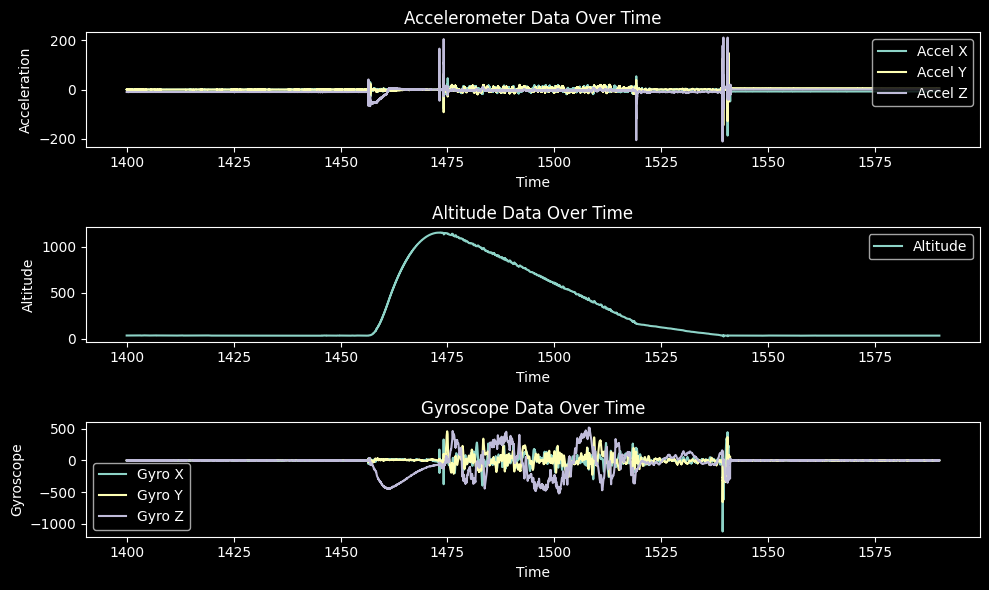

In [35]:
# Plot accelerometer data
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(df_m['time'], df_m['accel_x'], label='Accel X')
plt.plot(df_m['time'], df_m['accel_y'], label='Accel Y')
plt.plot(df_m['time'], df_m['accel_z'], label='Accel Z')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.legend()
plt.title('Accelerometer Data Over Time')

# Plot Altitude data
plt.subplot(3, 1, 2)
plt.plot(df_m['time'], df_m['altitude'], label='Altitude')
plt.xlabel('Time')
plt.ylabel('Altitude')
plt.legend()
plt.title('Altitude Data Over Time')

# Plot gyroscope data
plt.subplot(3, 1, 3)
plt.plot(df_m['time'], df_m['gyro_x'], label='Gyro X')
plt.plot(df_m['time'], df_m['gyro_y'], label='Gyro Y')
plt.plot(df_m['time'], df_m['gyro_z'], label='Gyro Z')
plt.xlabel('Time')
plt.ylabel('Gyroscope')
plt.legend()
plt.title('Gyroscope Data Over Time')

# Show the plot
plt.tight_layout()
plt.show()

Below is testing for various fitting methods


1400.000977 36.149574
1400.001953 36.149574
1400.003052 36.149574
1400.004028 36.149574
1400.005005 36.149574
1400.005981 36.149574
1400.006958 36.149574
1400.008057 36.149574
1400.009033 36.149574
1400.01001 36.149574
1400.010986 36.149574


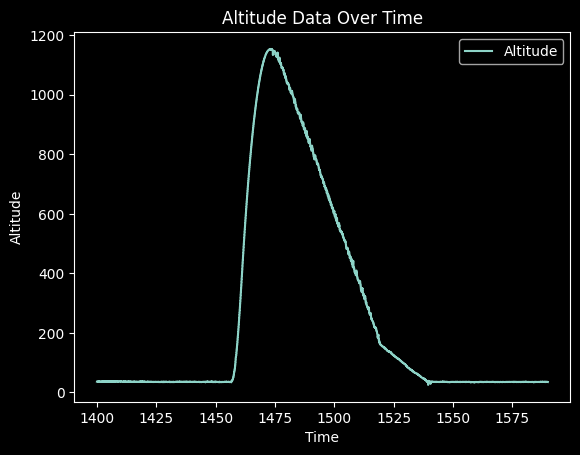

In [36]:
# Polynomial fit

plt.plot(df_m['time'], df_m['altitude'], label='Altitude')
plt.xlabel('Time')
plt.ylabel('Altitude')
plt.legend()
plt.title('Altitude Data Over Time')

count = 0
for index, row in df_m.iterrows():
    print(row['time'], row['altitude'])
    count += 1
    if (count > 10):
      break

Below is some simulation code. The first block is for modules which you will need to run to load into the python environment first. Lower blocks will be used to run the actual code.

In [37]:
import numpy as np
'''
Module / Class created for simulating the flight of a rocket using 1D motion approximations.
All unites in SI / metric unless explicitly stated otherwise
'''
class rocket_model_1D:
    itmax = 10000 #maximum number of simulation iterations

    def __init__ (self, mass, area, drag_coeff, density_model = 1, gravtiy_model = 1):
        # Define the rocket
        self.mass = mass
        self.massi = 1/mass
        self.ref_area = area # reference area for the drag coefficient
        self.Cd = drag_coeff
        self.density_model = density_model
        self.gravity_model  = gravtiy_model
        self.state = np.array([0.0,0.0]) #state = np.array([position, velocity])

    def initialize(self, position, velocity):
      self.state[0] = position
      self.state[1] = velocity

    def set_timestep(self, dt):
      self.dt = dt

    def CdA(self):
      return self.Cd * self.ref_area

    def rho(self):
      if (self.density_model == 1):
        return 1.2
      else:
        return float('NaN')

    def g(self):
      if (self.gravity_model == 1):
       return 9.81
      else:
        return float('NaN')

    def drag_force(self, velocity):
      vmag = abs(velocity)
      return 0.5*self.rho()*vmag*velocity*self.CdA()

    def acceleration(self):
      return -self.drag_force(self.state[1])*self.massi - self.g()

    def euler_step(self):
      self.state += self.dt * np.array([self.state[1], self.acceleration()])

    def sim_to_apogee(self):
      iter = 0;
      self.height = []
      self.time = []

      self.height.append(self.state[0])
      self.time.append(0)

      while (self.state[1] > 0) and (iter < self.itmax):
        self.euler_step()

        self.height.append(self.state[0])
        self.time.append(self.time[iter] + dt)
        iter += 1

      return self.state[0]

Apogee: %f
 468.00148622811963


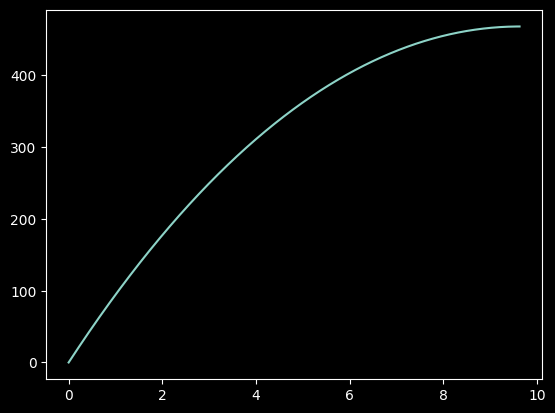

In [38]:
#Example code for running the 1D model

rkt_mass = 20     #kg
rxt_area = 0.1    #m
Cd = 0.06         #drag coefficient


test_rock = rocket_model_1D(rkt_mass, rxt_area, Cd)

h0 = 0   #m
v0 = 100 #m/s
test_rock.initialize(h0, v0)

dt = 0.001 #s
test_rock.set_timestep(dt)

test_apogee = test_rock.sim_to_apogee()
print("Apogee: %f\n", test_apogee)
plt.plot(test_rock.time, test_rock.height)